In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df =pd.read_csv("C:\\Users\\sanja\\Desktop\\Data portfolio projects\\Python\\50_Startups.csv")

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# One Hot Encoding to Change state from categorical to Numerical
from sklearn.preprocessing import OneHotEncoder 
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int8   
 4   Profit           50 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 1.7 KB


In [7]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


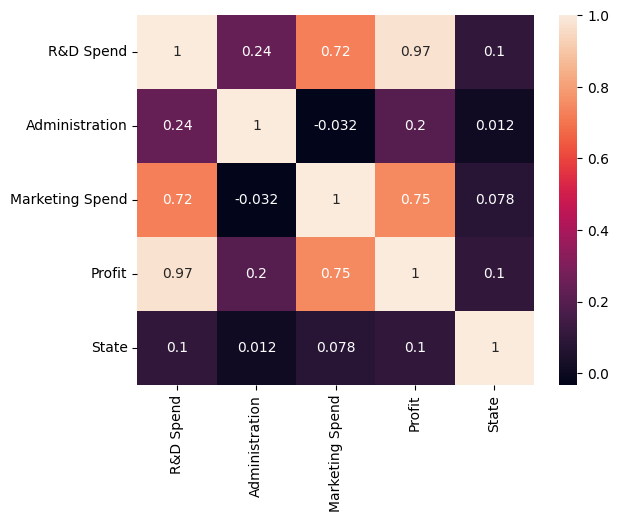

In [9]:
sns.heatmap(df[["R&D Spend", "Administration", "Marketing Spend",'Profit','State']].corr(), annot=True)
plt.show()

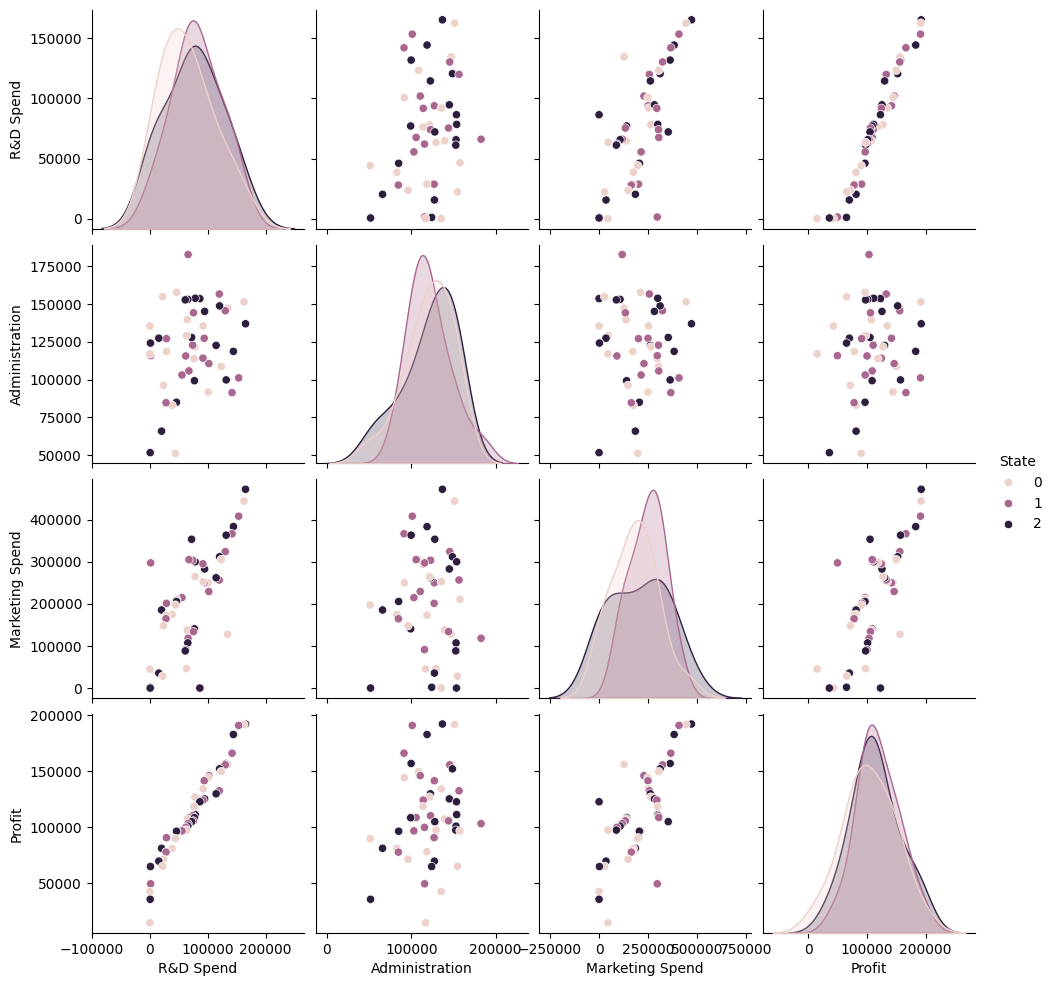

In [10]:
#Pairplot to get the correlation among the 4 features.b
sns.pairplot(df, hue='State')
plt.show()

In [11]:
#From above graph we get observation that¶

#R&D Spend and Profit are highly correlated and associated
#Marketing spend and Profit are also highly correlated and associated
#Administration is not correlataed or associated with Profit
#It means that profit majorly depends on R&D Spend and Marketing

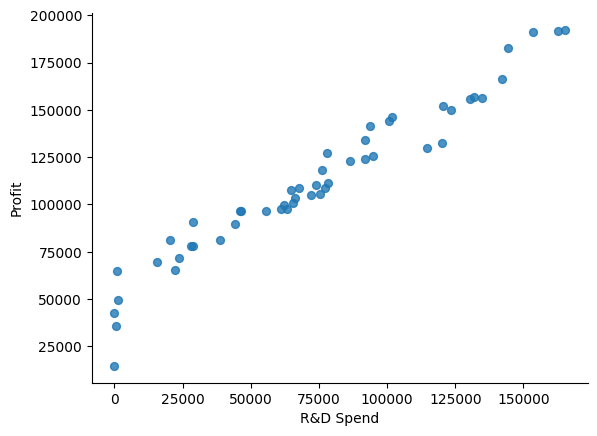

In [12]:
 #Now We will check how data is scattered visually by scatter plot
 # R&D Spend vs Profit

df.plot(kind='scatter', x='R&D Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# In the above visual,we can observe that data is linearly associated.

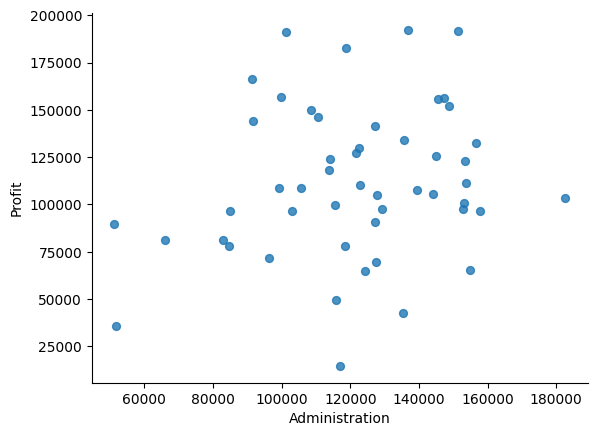

In [14]:
# Administration vs Profit

df.plot(kind='scatter', x='Administration', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [15]:
# In the above visual,we can see that there is no association.

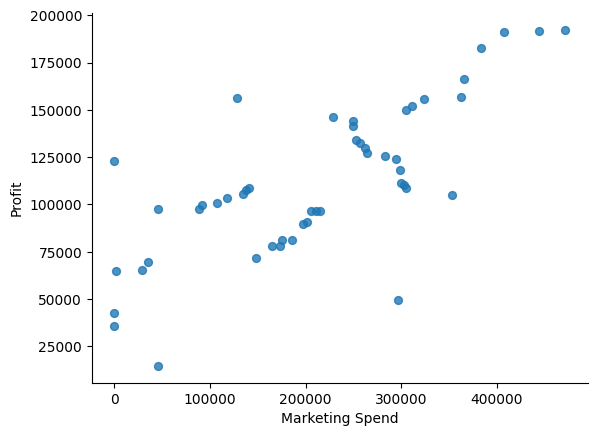

In [16]:
# Marketing Spend vs Profit

df.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
# In the above visual, we can observe some linearly association.

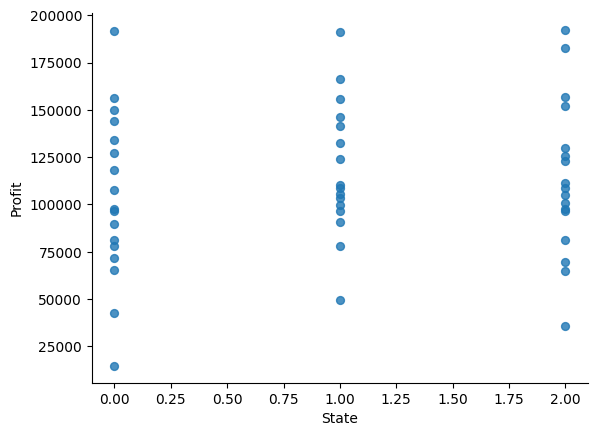

In [18]:
# State vs Profit

df.plot(kind='scatter', x='State', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
# We have majorly 3 states.

In [20]:
# From above observation, we concluded that Linear regression can be a best fit model for this

In [21]:
# Feature Selection
# We will select only those features which have association i.e., which majorly impacts our target variable
x = df[["R&D Spend","Marketing Spend"]]

#target variable
y = df["Profit"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [22]:
# Splitting into training set and testing set
# test_size=0.2 means the train set will be 80% and test set will be 20%
# random_state means that whenever we split the data it will split in same way as we have specified a number to it, the number can be anything

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Model Fitting
# We have selected Linear regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [24]:
print(xtest)

[[ 91992.39 252664.93]
 [ 38558.51 174999.3 ]
 [ 61994.48  91131.24]
 [  1000.23   1903.93]
 [ 94657.16 282574.31]
 [   542.05      0.  ]
 [ 75328.87 134050.07]
 [ 64664.71 137962.62]
 [ 63408.86  46085.25]
 [ 86419.7       0.  ]]


In [25]:
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     127521.386041
1      82615.074115
2      97683.246234
3      46400.656776
4     130782.536119


In [26]:
# Predicting on Sample data from dataset
d1=df.sample(10)
d1=d1[["R&D Spend","Marketing Spend"]]
d1=d1.to_numpy()
ypred1=model.predict(d1)
print(ypred1)

[[ 64027.71273746]
 [101140.12765188]
 [127521.38604123]
 [145529.29054499]
 [118712.31729256]
 [ 68659.49677377]
 [ 45542.39247751]
 [111412.81665009]
 [ 59083.53636033]
 [154127.18345169]]


In [27]:
# Model evaluation
from sklearn import metrics
mae = metrics.mean_absolute_error(ytest, ypred)
mse = metrics.mean_squared_error(ytest, ypred)
r2 = metrics.r2_score(ytest, ypred)
print(mae,mse,r2)

6469.181721468586 67343832.58979604 0.9168381183550247
